In [1]:
from functools import partial
from uncertainty_testbed.generators.data_generator_explicit import AnalyticBinaryClassGenerator
from uncertainty_testbed.utilities.functions import map_to_constant
from tensorflow import keras
from experiments.experiment_utils.plot_utils import run_uncertainty_numbers
from experiments.model_templates.sequential_dropout_dnn_classifier import build_mcdropout_model

2022-07-14 07:27:43.075296: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-14 07:27:43.075320: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dimensions = 10
event_name = "cauchy"
threshold = 0.5
noise_name = "cauchy"
noise_level = 0.01
n_all, n_train, n_val = 120096, 33280, 100096
s = partial(map_to_constant, c=noise_level)
eg = AnalyticBinaryClassGenerator(seed=42, num_inputs=dimensions, name=event_name, threshold=threshold,
                                  noise_distribution=noise_name, noise_scale=s)
mcd_classifier = build_mcdropout_model(optimizer=keras.optimizers.Adamax(learning_rate=0.0084))

2022-07-14 07:27:53.983149: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-14 07:27:53.983192: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-14 07:27:53.983216: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (xps): /proc/driver/nvidia/version does not exist
2022-07-14 07:27:53.983547: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/6
4160/4160 [==============================] - 7s 2ms/step - loss: 0.2538 - accuracy: 0.8904 - auc: 0.9618 - val_loss: 0.1539 - val_accuracy: 0.9395 - val_auc: 0.9857
Epoch 2/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.1336 - accuracy: 0.9519 - auc: 0.9886 - val_loss: 0.1241 - val_accuracy: 0.9556 - val_auc: 0.9896
Epoch 3/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.1087 - accuracy: 0.9626 - auc: 0.9915 - val_loss: 0.1138 - val_accuracy: 0.9612 - val_auc: 0.9914
Epoch 4/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.0991 - accuracy: 0.9667 - auc: 0.9924 - val_loss: 0.0934 - val_accuracy: 0.9685 - val_auc: 0.9930
Epoch 5/6
4160/4160 [==============================] - 6s 2ms/step - loss: 0.0950 - accuracy: 0.9691 - auc: 0.9925 - val_loss: 0.0901 - val_accuracy: 0.9711 - val_auc: 0.9937
Epoch 6/6
4160/4160 [==============================] - 6s 2ms/step - loss: 0.0910 - accuracy: 0.9714 - auc: 0.9928 - val_loss

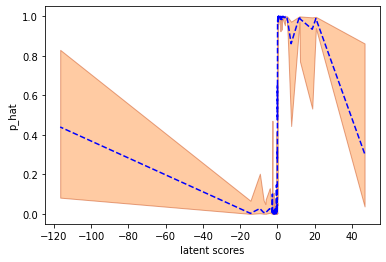

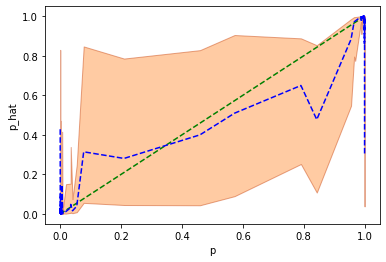

2022-07-14 07:28:35.964192: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 120000000 exceeds 10% of free system memory.
2022-07-14 07:29:45.420636: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 120000000 exceeds 10% of free system memory.


For noise level: functools.partial(<function map_to_constant at 0x7fc8e13fb3a0>, c=0.01): 77.06% within 90% CI


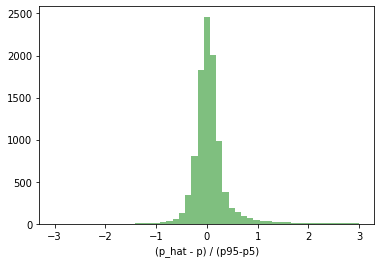

Percentage of 90% CI below 0.2: 0.8732
Average p95: 0.5495935881808401


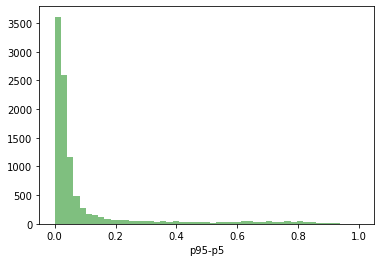

In [3]:
_ = run_uncertainty_numbers(eg, mcd_classifier, n_all, n_train, n_val, batch_size=8, epochs=6)

In [4]:
dimensions = 10
event_name = "cauchy"
threshold = 0.5
noise_name = "cauchy"
num_train_g = 100096
num_train = 33280
num_val = 20000
noise_level = 0.1
s = partial(map_to_constant, c=noise_level)
eg = AnalyticBinaryClassGenerator(seed=42, num_inputs=dimensions, name=event_name, threshold=threshold,
                                  noise_distribution=noise_name, noise_scale=s)
mcd_classifier = build_mcdropout_model(optimizer=keras.optimizers.Adamax(learning_rate=0.0056))

Epoch 1/6
4160/4160 [==============================] - 7s 2ms/step - loss: 0.3969 - accuracy: 0.8291 - auc: 0.9076 - val_loss: 0.3099 - val_accuracy: 0.8845 - val_auc: 0.9427
Epoch 2/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.2786 - accuracy: 0.8984 - auc: 0.9518 - val_loss: 0.2745 - val_accuracy: 0.9007 - val_auc: 0.9535
Epoch 3/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.2532 - accuracy: 0.9090 - auc: 0.9584 - val_loss: 0.2586 - val_accuracy: 0.9094 - val_auc: 0.9569
Epoch 4/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.2444 - accuracy: 0.9136 - auc: 0.9608 - val_loss: 0.2513 - val_accuracy: 0.9118 - val_auc: 0.9598
Epoch 5/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.2401 - accuracy: 0.9152 - auc: 0.9619 - val_loss: 0.2510 - val_accuracy: 0.9128 - val_auc: 0.9594
Epoch 6/6
4160/4160 [==============================] - 6s 2ms/step - loss: 0.2369 - accuracy: 0.9175 - auc: 0.9625 - val_loss

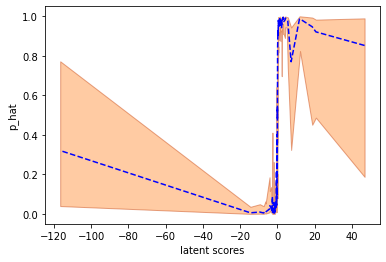

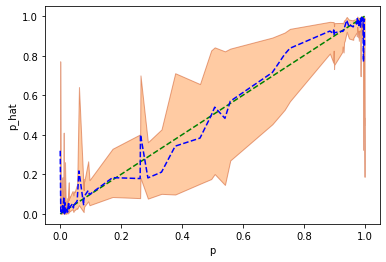

2022-07-14 07:31:35.309779: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 120000000 exceeds 10% of free system memory.
2022-07-14 07:32:44.991706: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 120000000 exceeds 10% of free system memory.


For noise level: functools.partial(<function map_to_constant at 0x7fc8e13fb3a0>, c=0.1): 89.49000000000001% within 90% CI


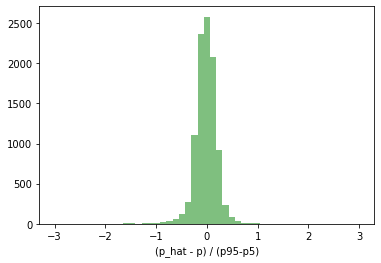

Percentage of 90% CI below 0.2: 0.7559
Average p95: 0.5690430897268653


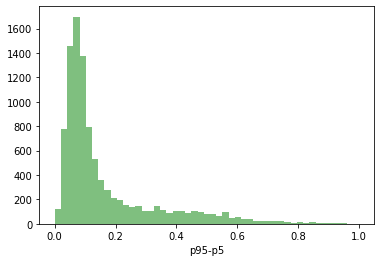

In [5]:
_ = run_uncertainty_numbers(eg, mcd_classifier, n_all, n_train, n_val, batch_size=8, epochs=6)

In [6]:
dimensions = 10
event_name = "cauchy"
threshold = 0.5
noise_name = "cauchy"
num_train_g = 100096
num_train = 33280
num_val = 20000
noise_level = 0.3
s = partial(map_to_constant, c=noise_level)
eg = AnalyticBinaryClassGenerator(seed=42, num_inputs=dimensions, name=event_name, threshold=threshold,
                                  noise_distribution=noise_name, noise_scale=s)
mcd_classifier = build_mcdropout_model(optimizer=keras.optimizers.Adamax(learning_rate=0.0056))

Epoch 1/6
4160/4160 [==============================] - 7s 2ms/step - loss: 0.5057 - accuracy: 0.7648 - auc: 0.8399 - val_loss: 0.4284 - val_accuracy: 0.8217 - val_auc: 0.8888
Epoch 2/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.4122 - accuracy: 0.8305 - auc: 0.8956 - val_loss: 0.3929 - val_accuracy: 0.8404 - val_auc: 0.9046
Epoch 3/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.3906 - accuracy: 0.8412 - auc: 0.9052 - val_loss: 0.3913 - val_accuracy: 0.8399 - val_auc: 0.9050
Epoch 4/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.3844 - accuracy: 0.8437 - auc: 0.9075 - val_loss: 0.3784 - val_accuracy: 0.8485 - val_auc: 0.9110
Epoch 5/6
4160/4160 [==============================] - 6s 1ms/step - loss: 0.3784 - accuracy: 0.8453 - auc: 0.9104 - val_loss: 0.3740 - val_accuracy: 0.8477 - val_auc: 0.9127
Epoch 6/6
4160/4160 [==============================] - 6s 2ms/step - loss: 0.3753 - accuracy: 0.8473 - auc: 0.9119 - val_loss

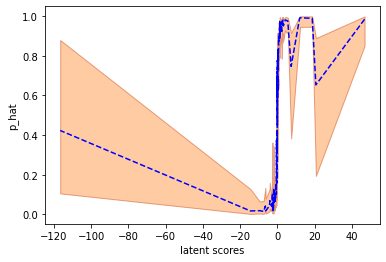

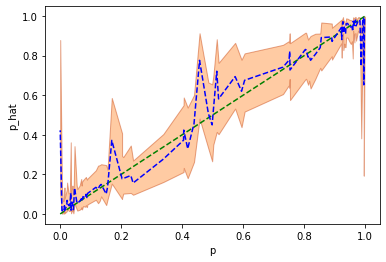

2022-07-14 07:34:33.969212: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 120000000 exceeds 10% of free system memory.


For noise level: functools.partial(<function map_to_constant at 0x7fc8e13fb3a0>, c=0.3): 92.86% within 90% CI


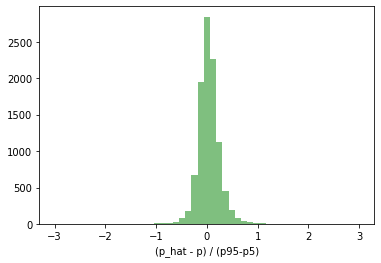

Percentage of 90% CI below 0.2: 0.6421
Average p95: 0.6015976996935904


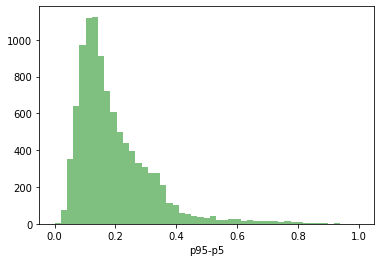

In [7]:
_ = run_uncertainty_numbers(eg, mcd_classifier, n_all, n_train, n_val, batch_size=8, epochs=6)